# NYC's COVID-19 Counts by Report Date

Data source: COVID-19 Daily Data Summary updates from the New York City Health Department (NYC Health):
* Latest data: https://www1.nyc.gov/site/doh/covid/covid-19-data.page
* Archive (all data): https://www1.nyc.gov/site/doh/covid/covid-19-data-archive.page

## 0. Import dependencies

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

## 1. Read data

In [2]:
file = '../data/nyc-health-daily-updates/nyc-covid-19-total-counts-by-report-date.csv'
df = pd.read_csv(file)
df

,date,time,total_tests,total_cases,total_hospitalizations,total_deaths
0,2020-03-17,18:00,NaN,923,NaN,10
1,2020-03-18,17:30,NaN,2009,NaN,19
2,2020-03-19,17:30,NaN,3954,NaN,26
3,2020-03-20,17:30,NaN,5683,NaN,43
4,2020-03-21,17:30,NaN,8115,NaN,60
5,2020-03-22,17:30,NaN,10764,NaN,99
6,2020-03-23,17:00,NaN,13119,NaN,125
7,2020-03-24,17:00,NaN,15597,2883.0,192
8,2020-03-25,17:30,NaN,20011,3922.0,280
9,2020-03-26,17:00,51404.0,23112,4720.0,365


In [3]:
for x in ('tests', 'cases', 'hospitalizations', 'deaths'):
    df['new_'+x] = df['total_'+x].diff()

df

,date,time,total_tests,total_cases,total_hospitalizations,total_deaths,new_tests,new_cases,new_hospitalizations,new_deaths
0,2020-03-17,18:00,NaN,923,NaN,10,NaN,NaN,NaN,NaN
1,2020-03-18,17:30,NaN,2009,NaN,19,NaN,1086.0,NaN,9.0
2,2020-03-19,17:30,NaN,3954,NaN,26,NaN,1945.0,NaN,7.0
3,2020-03-20,17:30,NaN,5683,NaN,43,NaN,1729.0,NaN,17.0
4,2020-03-21,17:30,NaN,8115,NaN,60,NaN,2432.0,NaN,17.0
5,2020-03-22,17:30,NaN,10764,NaN,99,NaN,2649.0,NaN,39.0
6,2020-03-23,17:00,NaN,13119,NaN,125,NaN,2355.0,NaN,26.0
7,2020-03-24,17:00,NaN,15597,2883.0,192,NaN,2478.0,NaN,67.0
8,2020-03-25,17:30,NaN,20011,3922.0,280,NaN,4414.0,1039.0,88.0
9,2020-03-26,17:00,51404.0,23112,4720.0,365,NaN,3101.0,798.0,85.0


In [4]:
# Define a function to create the date labels to show in the plot
def date_labels(dates):
    
    # Formats: '%m/%d', '%m/%d/%y', "%#d\n%b", "%b %#d", "%#d\n%b\n%Y"
    
    first_label = dates[0].strftime("%#d\n%b")
    #first_label = dates[0].strftime('%#m/%#d')
    
    last_label = dates[len(dates)-1].strftime("%#d\n%b")
    #last_label = dates[len(dates)-1].strftime('%#m/%#d/%y')
    
    labels = [first_label]
    
    for i in range(1, len(dates) - 1):
        label = dates[i].strftime("%#d")
        #label = dates[i].strftime('%#m/%#d')
        if dates[i].month != dates[i-1].month:
            label = dates[i].strftime("%#d\n%b")
            #label = dates[i].strftime('%#m/%#d')
            correct_last_label = True
        labels.append(label)
    
    if correct_last_label:
        last_label = dates[len(dates)-1].strftime("%#d")
    
    labels.append(last_label)
    
    return labels


df['date_obj'] = df['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

df['date_label'] = date_labels(df['date_obj'])

df

,date,time,total_tests,total_cases,total_hospitalizations,total_deaths,new_tests,new_cases,new_hospitalizations,new_deaths,date_obj,date_label
0,2020-03-17,18:00,NaN,923,NaN,10,NaN,NaN,NaN,NaN,2020-03-17,17\nMar
1,2020-03-18,17:30,NaN,2009,NaN,19,NaN,1086.0,NaN,9.0,2020-03-18,18
2,2020-03-19,17:30,NaN,3954,NaN,26,NaN,1945.0,NaN,7.0,2020-03-19,19
3,2020-03-20,17:30,NaN,5683,NaN,43,NaN,1729.0,NaN,17.0,2020-03-20,20
4,2020-03-21,17:30,NaN,8115,NaN,60,NaN,2432.0,NaN,17.0,2020-03-21,21
5,2020-03-22,17:30,NaN,10764,NaN,99,NaN,2649.0,NaN,39.0,2020-03-22,22
6,2020-03-23,17:00,NaN,13119,NaN,125,NaN,2355.0,NaN,26.0,2020-03-23,23
7,2020-03-24,17:00,NaN,15597,2883.0,192,NaN,2478.0,NaN,67.0,2020-03-24,24
8,2020-03-25,17:30,NaN,20011,3922.0,280,NaN,4414.0,1039.0,88.0,2020-03-25,25
9,2020-03-26,17:00,51404.0,23112,4720.0,365,NaN,3101.0,798.0,85.0,2020-03-26,26


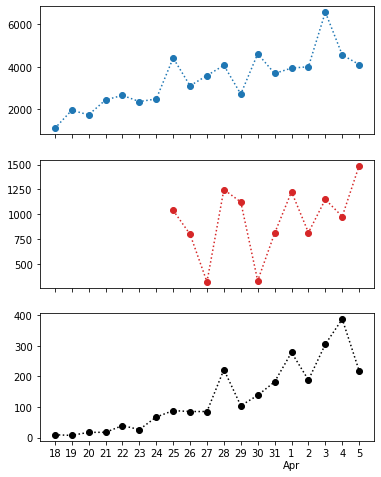

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(6, 8), sharex=True)

ax1.plot(df['date_label'], df['new_cases'], 'o:', color='C0', label='New Daily Cases\nby date of diagnosis')
ax2.plot(df['date_label'], df['new_hospitalizations'], 'o:', color='C3', label='New Daily Hospitalizations\nby date of admission')
ax3.plot(df['date_label'], df['new_deaths'], 'o:', color='k', label='New Daily Deaths\nby date of death')

plt.show()